In [ ]:
使用VGG16的结构提取图像特征，再根据特征建立mlp模型，实现猫狗图像识别，训练/测试数据

- 对数据进行分析、计算测试数据预测准确率
- 从网站下载猫/狗图片，对其进行预测
mlp模型一个隐藏层，10个神经元

In [2]:
# load the data
from keras.preprocessing.image import load_img,img_to_array

img_path = '1.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
type(img)

numpy.ndarray

In [11]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg = VGG16(weights='imagenet',include_top=False)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 244, 224, 3)


In [6]:
#特征提取
features = model_vgg.predict(x)
print(features.shape)

(1, 7, 7, 512)


In [7]:
# flatten 
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


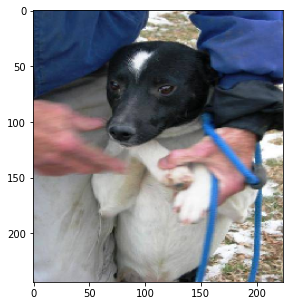

In [8]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
img = load_img(img_path,target_size=(244,224))
plt.imshow(img)

In [19]:
# load image and preprocess it with vgg16 structure
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_vgg = VGG16(weights='imagenet', include_top=False)
#define a method to load and preprocess the image
def modelProcess(img_path,model):
    img = load_img(img_path, target_size=(224,224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    return x_vgg
#list file names of the training datasets
import os
folder = './train2/cats'
dirs = os.listdir(folder)
#generate path for the images
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == ".jpg":
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]

#preprocess multiple images
features1 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features1[i] = feature_i

folder = './train2/dogs'
dirs = os.listdir(folder)
#generate path for the images
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == ".jpg":
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]

#preprocess multiple images
features2 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features2[i] = feature_i

#label the result
print(features1.shape,features2.shape)
y1 = np.zeros(300)
y2 = np.ones(300)

#generate the training data
X = np.concatenate((features1,features2),axis=0)
y = np.concatenate((y1,y2),axis=0)
y = y.reshape(-1,1)
print(X.shape,y.shape)

preprocessed: ./train2/cats//cat.0.jpg
preprocessed: ./train2/cats//cat.1.jpg
preprocessed: ./train2/cats//cat.10.jpg
preprocessed: ./train2/cats//cat.100.jpg
preprocessed: ./train2/cats//cat.101.jpg
preprocessed: ./train2/cats//cat.102.jpg
preprocessed: ./train2/cats//cat.103.jpg
preprocessed: ./train2/cats//cat.104.jpg
preprocessed: ./train2/cats//cat.105.jpg
preprocessed: ./train2/cats//cat.106.jpg
preprocessed: ./train2/cats//cat.107.jpg
preprocessed: ./train2/cats//cat.108.jpg
preprocessed: ./train2/cats//cat.109.jpg
preprocessed: ./train2/cats//cat.11.jpg
preprocessed: ./train2/cats//cat.110.jpg
preprocessed: ./train2/cats//cat.111.jpg
preprocessed: ./train2/cats//cat.112.jpg
preprocessed: ./train2/cats//cat.113.jpg
preprocessed: ./train2/cats//cat.114.jpg
preprocessed: ./train2/cats//cat.115.jpg
preprocessed: ./train2/cats//cat.116.jpg
preprocessed: ./train2/cats//cat.117.jpg
preprocessed: ./train2/cats//cat.118.jpg
preprocessed: ./train2/cats//cat.119.jpg
preprocessed: ./train2

preprocessed: ./train2/cats//cat.28.jpg
preprocessed: ./train2/cats//cat.280.jpg
preprocessed: ./train2/cats//cat.281.jpg
preprocessed: ./train2/cats//cat.282.jpg
preprocessed: ./train2/cats//cat.283.jpg
preprocessed: ./train2/cats//cat.284.jpg
preprocessed: ./train2/cats//cat.285.jpg
preprocessed: ./train2/cats//cat.286.jpg
preprocessed: ./train2/cats//cat.287.jpg
preprocessed: ./train2/cats//cat.288.jpg
preprocessed: ./train2/cats//cat.289.jpg
preprocessed: ./train2/cats//cat.29.jpg
preprocessed: ./train2/cats//cat.290.jpg
preprocessed: ./train2/cats//cat.291.jpg
preprocessed: ./train2/cats//cat.292.jpg
preprocessed: ./train2/cats//cat.293.jpg
preprocessed: ./train2/cats//cat.294.jpg
preprocessed: ./train2/cats//cat.295.jpg
preprocessed: ./train2/cats//cat.296.jpg
preprocessed: ./train2/cats//cat.297.jpg
preprocessed: ./train2/cats//cat.298.jpg
preprocessed: ./train2/cats//cat.299.jpg
preprocessed: ./train2/cats//cat.3.jpg
preprocessed: ./train2/cats//cat.30.jpg
preprocessed: ./train

preprocessed: ./train2/dogs//dog.192.jpg
preprocessed: ./train2/dogs//dog.193.jpg
preprocessed: ./train2/dogs//dog.194.jpg
preprocessed: ./train2/dogs//dog.195.jpg
preprocessed: ./train2/dogs//dog.196.jpg
preprocessed: ./train2/dogs//dog.197.jpg
preprocessed: ./train2/dogs//dog.198.jpg
preprocessed: ./train2/dogs//dog.199.jpg
preprocessed: ./train2/dogs//dog.2.jpg
preprocessed: ./train2/dogs//dog.20.jpg
preprocessed: ./train2/dogs//dog.200.jpg
preprocessed: ./train2/dogs//dog.201.jpg
preprocessed: ./train2/dogs//dog.202.jpg
preprocessed: ./train2/dogs//dog.203.jpg
preprocessed: ./train2/dogs//dog.204.jpg
preprocessed: ./train2/dogs//dog.205.jpg
preprocessed: ./train2/dogs//dog.206.jpg
preprocessed: ./train2/dogs//dog.207.jpg
preprocessed: ./train2/dogs//dog.208.jpg
preprocessed: ./train2/dogs//dog.209.jpg
preprocessed: ./train2/dogs//dog.21.jpg
preprocessed: ./train2/dogs//dog.210.jpg
preprocessed: ./train2/dogs//dog.211.jpg
preprocessed: ./train2/dogs//dog.212.jpg
preprocessed: ./trai

In [20]:
# split the training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)
print(X_train.shape,X_test.shape,X.shape)

(420, 25088) (180, 25088) (600, 25088)


In [21]:
#set up the mlp model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=25088))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                250890    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [22]:
#configure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#train the model
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
14/14 [==============================] - 0s 8ms/step - loss: 1.5296 - accuracy: 0.8381
Epoch 2/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0652 - accuracy: 0.9524
Epoch 3/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0676 - accuracy: 0.9690
Epoch 4/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0564 - accuracy: 0.9833
Epoch 5/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0311 - accuracy: 0.9762
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.9738
Epoch 7/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0233 - accuracy: 0.9857
Epoch 8/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 9/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 10/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 11/50
14/14

In [23]:
from sklearn.metrics import accuracy_score
y_train_predict = model.predict_classes(X_train)
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
1.0


In [24]:
y_test_predict = model.predict_classes(X_test)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9722222222222222


In [26]:
img_path = 'dog.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
features = model_vgg.predict(x)
features = features.reshape(1,7*7*512)
result = model.predict_classes(features)
print(result)

[[1]]


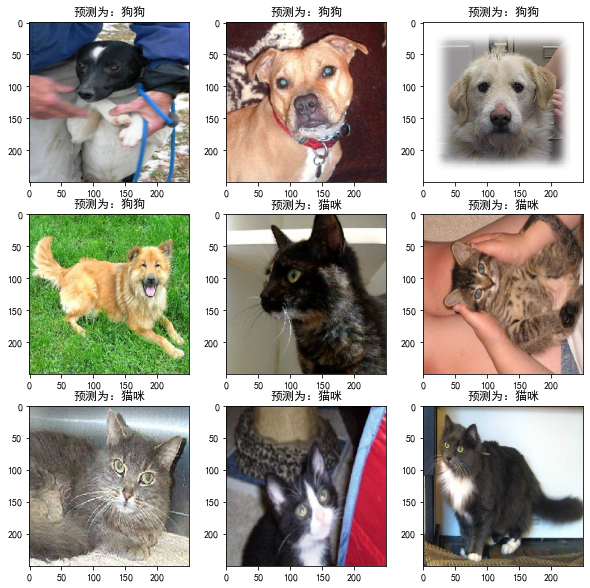

In [27]:
# make prediction on multiple images
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size' : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
a = [i for i in range(1,10)]
fig = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.jpg'
    img_path = img_name
    img = load_img(img_path, target_size=(224,224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model_vgg.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    result = model.predict_classes(x_vgg)
    img_ori = load_img(img_name,target_size=(250,250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫咪')
plt.show()

In [ ]:
基于VGG16、结合mlp实现猫狗识别图像实战summary

- 基于经典的VGG16结构，实现了图像识别模型的快速搭建与训练，并完成猫狗识别任务；
- 掌握了拆分已经训练好的模型结构的方法，实现了对其灵活应用；
- 更熟练的运用mlp模型，并将其与其他模型相结合，实现更复杂的任务
- 通过VGG16-MLP的模型，实现了在小数据集情况下的模型快速训练并获得较高的准确率